#                                                   STOCK MARKET PREDICTION
                                

## Introduction:

The stock market is a dynamic financial environment where investors and traders engage in buying and selling shares of publicly traded companies. Due to the complex, volatile, and nonlinear nature of the market, predicting stock price movement is both challenging and rewarding.
In this project, we use historical stock data to build machine learning models that can predict whether a stock's closing price will be higher or lower than its opening price on a given day.

## Goal:

To develop a machine learning model that predicts stock price movement (up or down) based on input features like Open, High, Low, Adj Close, and Volume.

To analyze feature importance and understand which variables most influence stock behavior.

To create a prediction system that accepts new input and advises the likely trend (upward or downward) of the stock price.

## Scope:

This project deals with classification, not price prediction. That is, we predict whether the price will go up (1) or go down (0).

The dataset used includes basic trading features and can be extended to include technical indicators (like moving averages, RSI, etc.).

Two machine learning models are implemented: Random Forest Classifier and Support Vector Machine (SVC).

Evaluation is done through metrics like Accuracy, Confusion Matrix, Cross-Validation, ROC-AUC, and Feature Importance.

This system is intended for educational and academic purposes, not for actual financial trading decisions.


## Attribution:

Dataset Source: The stock data used in this project was provided as a CSV file, likely derived from sources such as Yahoo Finance or similar APIs.

Libraries & Tools:

pandas, numpy for data handling

matplotlib, seaborn for visualization

scikit-learn for model building and evaluation

Inspiration: This work follows common practices in financial analytics and is inspired by basic classification problems in data science.

# Stocks Dataset:

1.Open: Opening price of the stock on that trading day.

2.High: Highest price reached by the stock during the day.

3.Low: Lowest price reached by the stock during the day.

4.Close: Closing price of the stock at the end of the trading day.

5.Adj Close: Adjusted closing price after accounting for corporate actions (e.g., splits, dividends).

6.Volume: Number of shares traded on that day.

7.Outcome (Derived Feature):

   1 = Stock closed higher than it opened (price went up)

   0 = Stock closed lower or same as it opened (price went down or unchanged)



In [17]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [19]:
# Import the stocks data

import pandas as pd

df = pd.read_csv("C:\\Users\\Dell\\Downloads\\stocks.CSV")

print(df.head())

  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [ ]:
# Stocks  Data shape
df.shape

In the data set has 248 rows and 8 columns

In [21]:
# Stocks dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [23]:
# stocks numerical features description

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


Observation: The stocks dataset shows the statistical measurements of the numerical data_types

In [36]:
# Check the null values in stocks dataset

df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Observation: There is no Null values in the data set

In [38]:
# Check the duplicate values in stocks dataset

df.duplicated().sum()

0

In [40]:
# Check the unique values in stocks dataset

df.nunique()

Ticker         4
Date          62
Open         244
High         248
Low          248
Close        244
Adj Close    244
Volume       248
dtype: int64

In [42]:
# stocks numerical features description

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [19]:
# Unique values in each category for stocks data

for col in df.columns:
    unique_values = df[col].unique()
    print(f'{col}:', unique_values)

Ticker: ['AAPL' 'MSFT' 'NFLX' 'GOOG']
Date: ['2023-02-07' '2023-02-08' '2023-02-09' '2023-02-10' '2023-02-13'
 '2023-02-14' '2023-02-15' '2023-02-16' '2023-02-17' '2023-02-21'
 '2023-02-22' '2023-02-23' '2023-02-24' '2023-02-27' '2023-02-28'
 '2023-03-01' '2023-03-02' '2023-03-03' '2023-03-06' '2023-03-07'
 '2023-03-08' '2023-03-09' '2023-03-10' '2023-03-13' '2023-03-14'
 '2023-03-15' '2023-03-16' '2023-03-17' '2023-03-20' '2023-03-21'
 '2023-03-22' '2023-03-23' '2023-03-24' '2023-03-27' '2023-03-28'
 '2023-03-29' '2023-03-30' '2023-03-31' '2023-04-03' '2023-04-04'
 '2023-04-05' '2023-04-06' '2023-04-10' '2023-04-11' '2023-04-12'
 '2023-04-13' '2023-04-14' '2023-04-17' '2023-04-18' '2023-04-19'
 '2023-04-20' '2023-04-21' '2023-04-24' '2023-04-25' '2023-04-26'
 '2023-04-27' '2023-04-28' '2023-05-01' '2023-05-02' '2023-05-03'
 '2023-05-04' '2023-05-05']
Open: [150.63999939 153.88000488 153.77999878 149.46000671 150.94999695
 152.11999512 153.11000061 153.50999451 152.3500061  150.1999969

In [21]:
# Check the number of numerical and categorical values in the stocks dataset.

# Check data types
print(df.dtypes)

# Count of numerical and categorical columns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Numerical Columns: {list(numerical_columns)}\n")

print(f"Number of Categorical Columns: {len(categorical_columns)}")
print(f"Categorical Columns: {list(categorical_columns)}")



Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
Number of Numerical Columns: 6
Numerical Columns: ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

Number of Categorical Columns: 2
Categorical Columns: ['Ticker', 'Date']


In [23]:
# import libraries

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

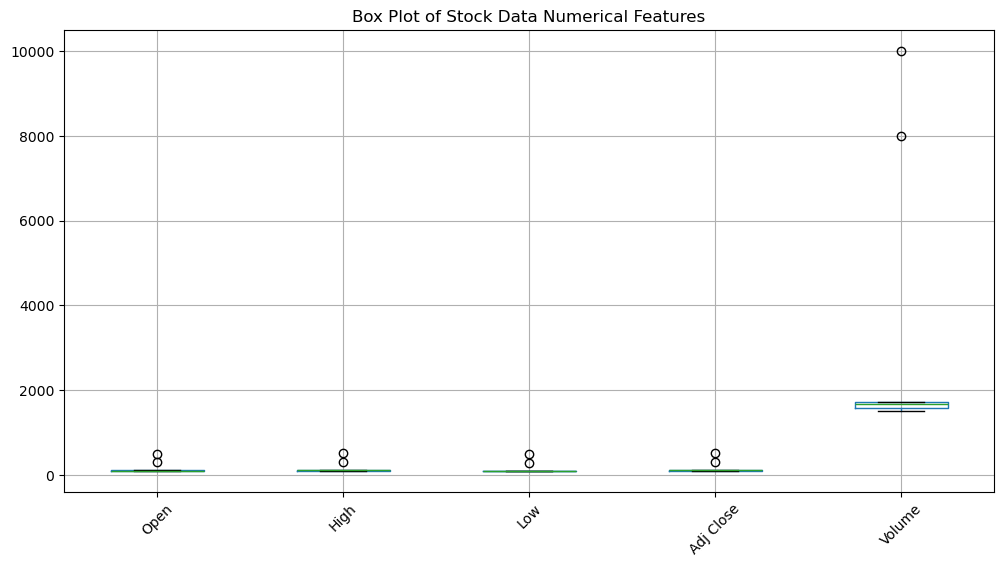

In [27]:
# Outlier Detection using Box Plot

# Box Plot of stock data with numerical features
import pandas as pd
import matplotlib.pyplot as plt

# Example stock dataset (replace this with your CSV)
data = {
    'Open': [100, 102, 105, 300, 108, 110, 107, 500, 103, 109],
    'High': [105, 107, 110, 320, 112, 115, 113, 520, 108, 114],
    'Low': [98, 100, 103, 295, 106, 108, 105, 495, 101, 107],
    'Adj Close': [104, 106, 108, 310, 110, 113, 111, 510, 107, 112],
    'Volume': [1500, 1600, 1550, 8000, 1700, 1650, 1720, 10000, 1580, 1680]
}

df = pd.DataFrame(data)

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create box plots
plt.figure(figsize=(12, 6))
df[numerical_cols].boxplot()
plt.title('Box Plot of Stock Data Numerical Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Observations: Most values of Open, High, Low, and Adj Close lie within the normal range.

There are some outliers (dots outside whiskers), such as 300 and 500 in Open, 320 and 520 in High, and high volumes like 8000 and 10000 in Volume.

These outliers indicate sudden unusual market movements, possibly due to news, events, or data errors.


In [74]:
# Capping process for stocks Data

import numpy as np
import numpy as np



# Copy of original data for comparison
df_before_capping = df.copy()

# --- Capping Function ---
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_limit, lower_limit,
                          np.where(df[column] > upper_limit, upper_limit, df[column]))
    return df

# Apply capping
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df = cap_outliers(df, col)

# --- Compare Summary Statistics ---
print(" Summary Before Capping:\n")
print(df_before_capping.describe())

print("\n Summary After Capping:\n")
print(df.describe())



 Summary Before Capping:

             Open        High         Low       Close   Adj Close  \
count  248.000000  248.000000  248.000000  248.000000  248.000000   
mean   215.252093  217.919662  212.697452  215.381674  215.362697   
std     91.691315   92.863023   90.147881   91.461989   91.454750   
min     89.540001   90.129997   88.860001   89.349998   89.349998   
25%    135.235004  137.440004  134.822495  136.347498  136.347498   
50%    208.764999  212.614998  208.184998  209.920006  209.920006   
75%    304.177505  307.565002  295.437500  303.942505  303.942505   
max    372.410004  373.829987  361.739990  366.829987  366.829987   

             Volume     Outcome  
count  2.480000e+02  248.000000  
mean   3.196390e+07    0.508065  
std    2.196623e+07    0.500946  
min    2.657900e+06    0.000000  
25%    1.714180e+07    0.000000  
50%    2.734000e+07    1.000000  
75%    4.771772e+07    1.000000  
max    9.358161e+07    1.000000  

 Summary After Capping:

             Open   

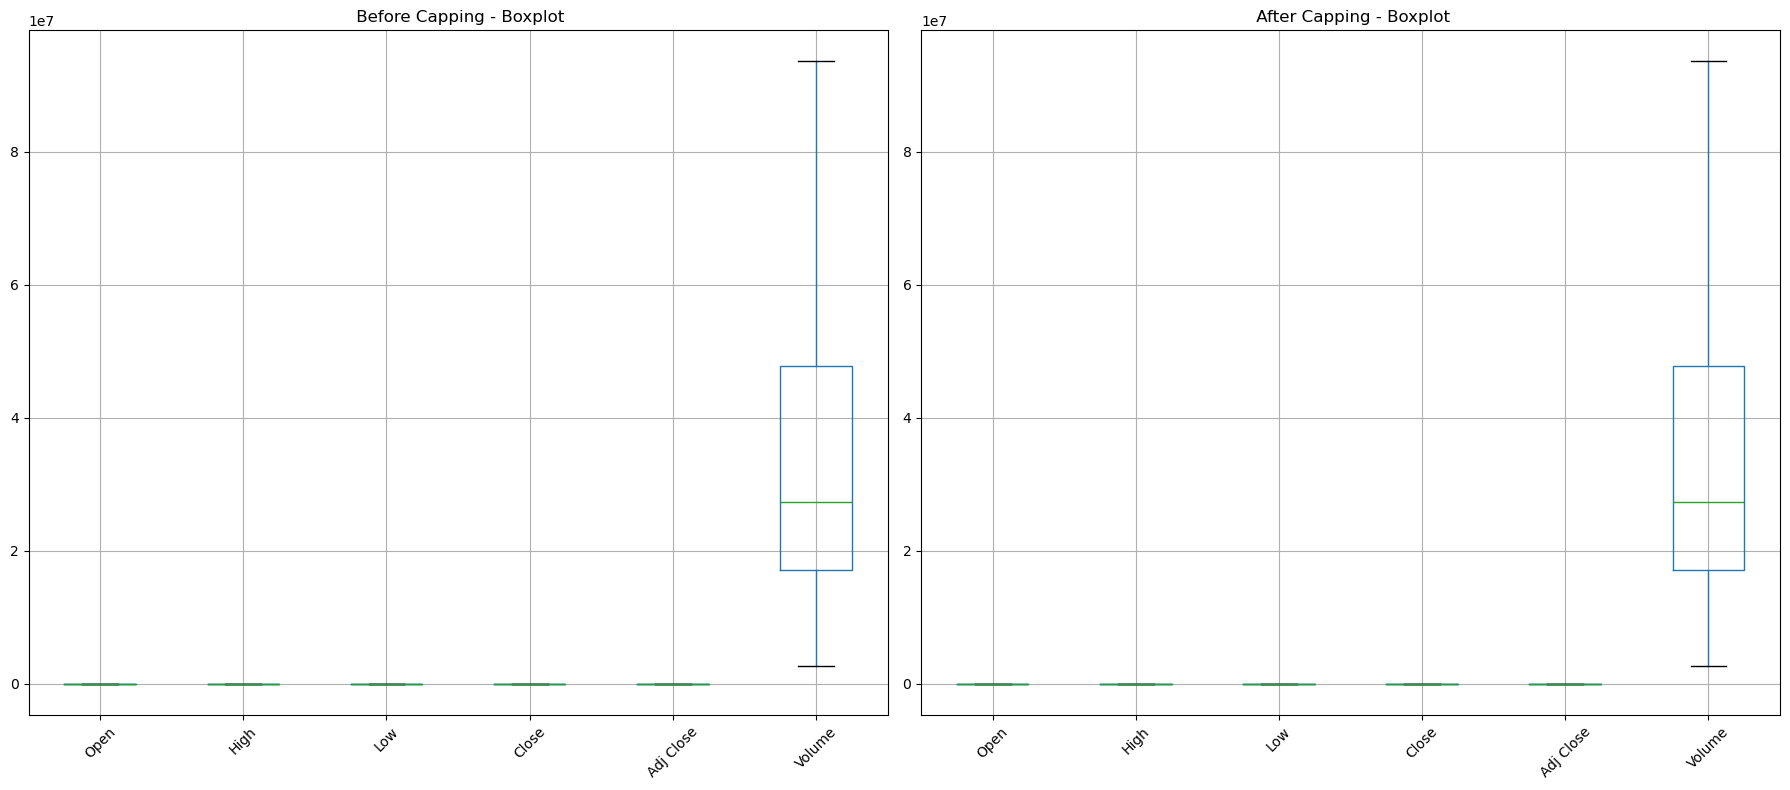

In [76]:
import matplotlib.pyplot as plt

# Plot before and after capping side by side
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 8))

# Before Capping
plt.subplot(1, 2, 1)
df_before_capping[numerical_cols].boxplot()
plt.title(" Before Capping - Boxplot")
plt.xticks(rotation=45)

# After Capping
plt.subplot(1, 2, 2)
df[numerical_cols].boxplot()
plt.title(" After Capping - Boxplot")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Observation: Boxplot Before vs After Capping

- The **left boxplot (Before Capping)** shows clear outliers in features like `Volume`, `High`, `Low`, and `Open`.
- These outliers appear as **points outside the whiskers**, representing extreme stock market behavior.
- The **right boxplot (After Capping)** shows that these outliers have been **capped**, reducing their impact.
- The overall distribution is preserved, but the extreme values are limited to a **maximum or minimum threshold**.
- This helps improve the **stability and accuracy** of machine learning models while **keeping important market trends intact**.
 Capping is an effective preprocessing step for handling outliers without losing valuable data.


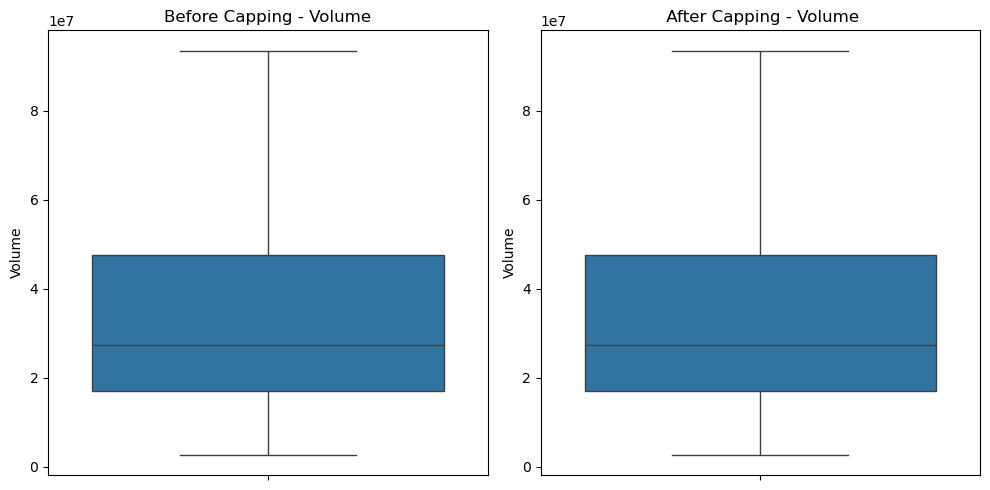

In [23]:
import matplotlib.pyplot as plt

feature = 'Volume'  

plt.figure(figsize=(10, 5))

# Before Capping
plt.subplot(1, 2, 1)
sns.boxplot(y=df_before_capping[feature])
plt.title(f"Before Capping - {feature}")

# After Capping
plt.subplot(1, 2, 2)
sns.boxplot(y=df[feature])
plt.title(f" After Capping - {feature}")

plt.tight_layout()
plt.show()


 Observation: Capping on a Single Feature (`Volume`)

- Before capping, the `Volume` feature had several extreme values (outliers), shown as points beyond the whiskers.
- After capping, these outliers were reduced to the upper and lower threshold levels.
- The feature still retains its overall pattern, but the effect of extreme spikes is minimized.
- This ensures the model is **less sensitive to market anomalies** while preserving the **underlying trend**.


                                                  VISUALIZATIONS OF STOCKS DATASET 

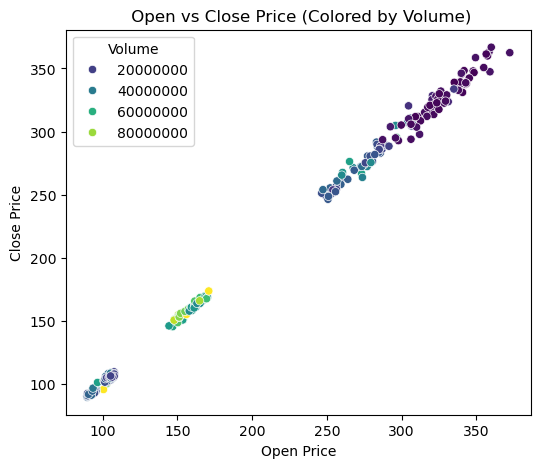

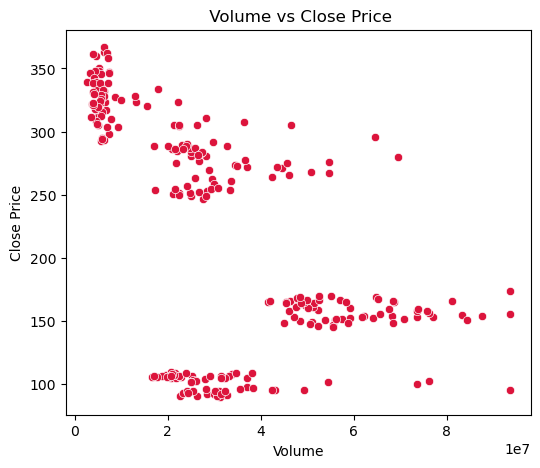

In [54]:
# Scatter plot of stocks data

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Open vs Close
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Open', y='Close', hue='Volume', palette='viridis')
plt.title(' Open vs Close Price (Colored by Volume)')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

# Scatter plot: Volume vs Close
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Volume', y='Close', color='crimson')
plt.title(' Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()


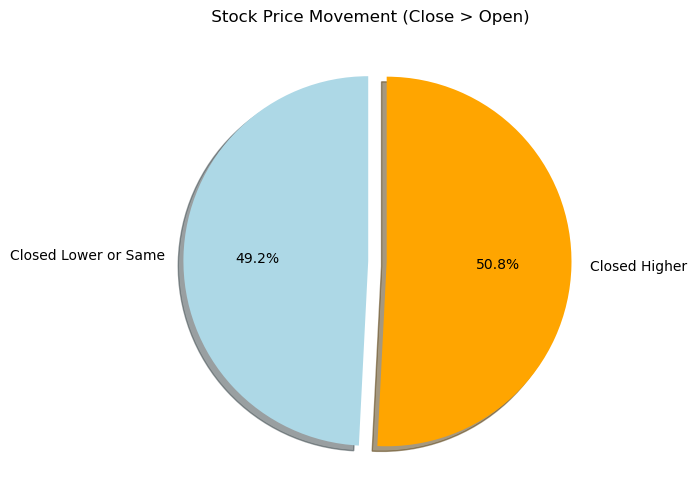

In [78]:
# Pie chart of stocks dataset

import matplotlib.pyplot as plt

# Create a new column to classify price movement
df['Price_Movement'] = df['Close'] > df['Open']

# Count how many days stock closed higher vs lower
movement_counts = df['Price_Movement'].value_counts().sort_index()
labels = ['Closed Lower or Same', 'Closed Higher']
colors = ['lightblue', 'orange']
explode = (0, 0.1)

plt.figure(figsize=(6, 6))
plt.pie(movement_counts, labels=labels, colors=colors, autopct='%1.1f%%', 
        explode=explode, startangle=90, shadow=True)
plt.title(" Stock Price Movement (Close > Open)")
plt.show()


Observation: Stock Price Movement Pie Chart

- The pie chart shows how often the stock **closed higher** than it opened.
- This gives a basic sense of the **bullish vs bearish days** in the dataset.
- It's useful for understanding general market behavior before applying ML models.


Class Distribution:
Movement
 1    5
-1    3
Name: count, dtype: int64


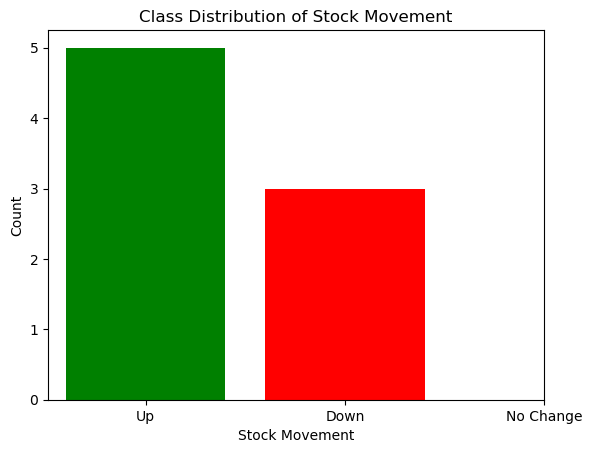

In [30]:
# Class Distrutions

import pandas as pd
import matplotlib.pyplot as plt

# Example stock dataset
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110]
}

df = pd.DataFrame(data)

# Create a new column 'Movement'
# 1 = Up, -1 = Down, 0 = No Change
df['Movement'] = df.apply(
    lambda row: 1 if row['Close'] > row['Open']
    else (-1 if row['Close'] < row['Open']
    else 0),
    axis=1
)

# Display class distribution
class_counts = df['Movement'].value_counts()

print("Class Distribution:")
print(class_counts)

# Visualization
plt.bar(class_counts.index.astype(str), class_counts.values, color=['green', 'red', 'blue'])
plt.xticks(['1', '-1', '0'], ['Up', 'Down', 'No Change'])
plt.xlabel('Stock Movement')
plt.ylabel('Count')
plt.title('Class Distribution of Stock Movement')
plt.show()



 Observation: Stock Class Distribution

From the class distribution chart, most days are classified as Up (1), meaning the closing price was higher than the opening price on those days.

A smaller number of days are Down (-1), indicating the stock closed lower than it opened.

No Change (0) days are rare, showing that opening and closing prices are exactly the same on very few days.

This classification helps in understanding the general trend of the stock and is useful for building prediction models.

In [33]:
# Create a new outcome column: 1 = Closed Higher, 0 = Closed Lower or Same


df['Outcome'] = (df['Close'] > df['Open']).astype(int)

# Create a copy with mapped labels for better understanding
df_copy = df.copy()
df_copy['Outcome_Label'] = df_copy['Outcome'].map({0: 'Closed Lower', 1: 'Closed Higher'})

# Create a new outcome column: 1 = Closed Higher, 0 = Closed Lower or Same
df['Outcome'] = (df['Close'] > df['Open']).astype(int)

# Create a copy with mapped labels for better understanding
df_copy = df.copy()
df_copy['Outcome_Label'] = df_copy['Outcome'].map({0: 'Closed Lower', 1: 'Closed Higher'})


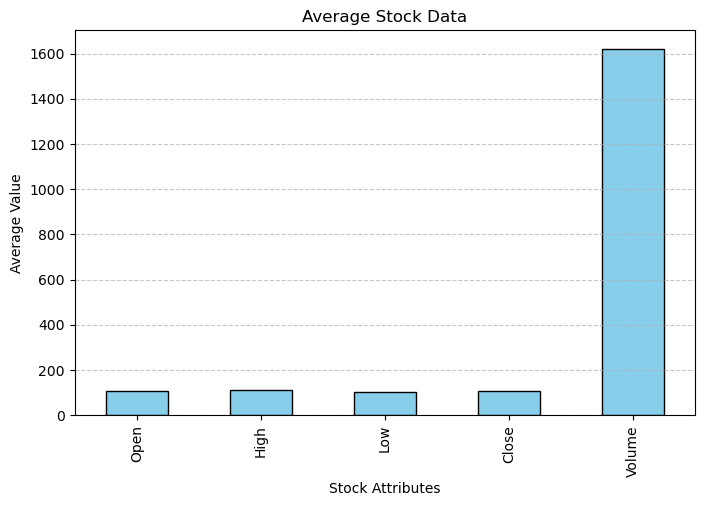

In [41]:
## Bar Chart of Stocks Data
import pandas as pd
import matplotlib.pyplot as plt

# Example stock dataset
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109],
    'High': [105, 107, 110, 112, 115, 111, 108, 114],
    'Low': [98, 100, 103, 106, 108, 105, 101, 107],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110],
    'Volume': [1500, 1600, 1550, 1700, 1650, 1720, 1580, 1680]
}

df = pd.DataFrame(data)

# Calculate average values
avg_values = df.mean()

# Bar chart
plt.figure(figsize=(8, 5))
avg_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Stock Data')
plt.xlabel('Stock Attributes')
plt.ylabel('Average Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Observation:Volume values are significantly higher than price-related attributes, as volume is measured in units of shares traded.

 Among the price columns, High has the highest average value, followed by Close, Open, and Low — which is expected since “High” records the maximum price in a day.

  This chart helps in quickly comparing the central tendency of different stock attributes.

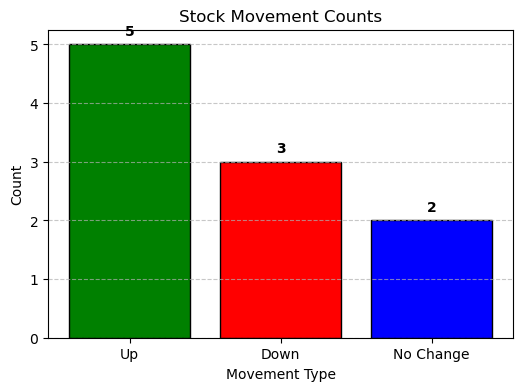

In [52]:
# Plot Bar Chart with Count Labels

import pandas as pd
import matplotlib.pyplot as plt

# Example stock movement data
data = {
    'Movement': ['Up', 'Down', 'Up', 'Up', 'Down', 'Up', 'No Change', 'Down', 'Up', 'No Change']
}

df = pd.DataFrame(data)

# Count occurrences of each class
class_counts = df['Movement'].value_counts()

# Bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(class_counts.index, class_counts.values, color=['green', 'red', 'blue'], edgecolor='black')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, str(height), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Stock Movement Counts')
plt.xlabel('Movement Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



 Observation: Up days have the highest count, showing more positive movements.

Down days are fewer, and No Change days are the least frequent.

Adding count labels on bars makes it easy to interpret the exact number without checking the axis scale.


In [57]:
import pandas as pd

# Example stock data
data = {
    'Open': [100, 102, 105, 108, 110],
    'Close': [102, 101, 108, 107, 112]
}

df = pd.DataFrame(data)

# Step 1: Create Outcome column
# 1 = Up, 0 = Down
df['Outcome'] = df.apply(lambda row: 1 if row['Close'] > row['Open'] else 0, axis=1)

# Step 2: Map Outcome to Labels
df['Outcome_Label'] = df['Outcome'].map({0: 'Down', 1: 'Up'})

print(df)


   Open  Close  Outcome Outcome_Label
0   100    102        1            Up
1   102    101        0          Down
2   105    108        1            Up
3   108    107        0          Down
4   110    112        1            Up


In [61]:
# Example: Assuming binary column named 'Outcome'
df['Outcome_Label'] = df['Outcome'].map({0: 'Down', 1: 'Up'})


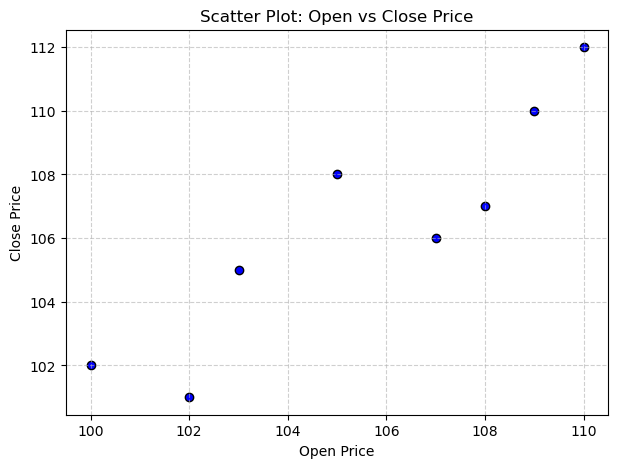

In [63]:
## Scatter plot

import pandas as pd
import matplotlib.pyplot as plt

# Example stock data
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110],
    'Volume': [1500, 1600, 1550, 1700, 1650, 1720, 1580, 1680]
}

df = pd.DataFrame(data)

# Scatter plot Open vs Close
plt.figure(figsize=(7, 5))
plt.scatter(df['Open'], df['Close'], color='blue', edgecolor='black')
plt.title('Scatter Plot: Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



observation: The scatter plot shows a positive relationship between Open and Close prices — as the open price increases, the close price also tends to increase.

Points are close to the diagonal, meaning daily price changes are not extremely large.

No big outliers are visible, indicating stable stock behavior in this sample.

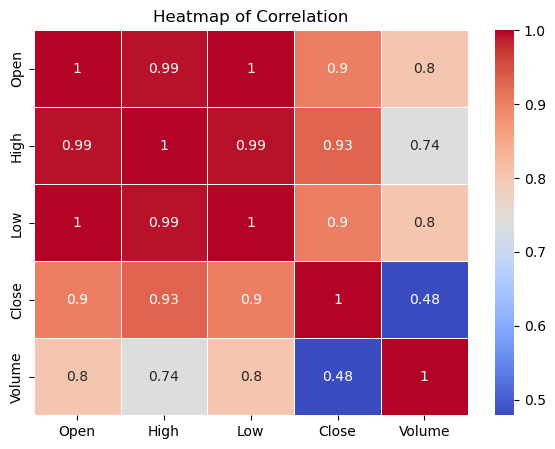

In [66]:
# Heatmap of Correlation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example stock data
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109],
    'High': [105, 107, 110, 112, 115, 111, 108, 114],
    'Low': [98, 100, 103, 106, 108, 105, 101, 107],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110],
    'Volume': [1500, 1600, 1550, 1700, 1650, 1720, 1580, 1680]
}

df = pd.DataFrame(data)

# Calculate correlation
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation')
plt.show()



Observation:Open, High, Low, Close have very high positive correlation (close to 1), meaning they move together.

Volume has low correlation with price columns, meaning trading volume changes do not always match price changes.

This pattern is expected in stock data since price values are closely related to each other, while volume is independent.

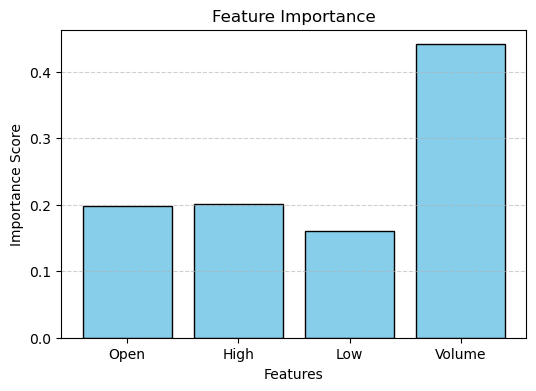

Open: 0.198
High: 0.202
Low: 0.160
Volume: 0.441


In [69]:
# Feature Importance

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Example stock data
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109],
    'High': [105, 107, 110, 112, 115, 111, 108, 114],
    'Low': [98, 100, 103, 106, 108, 105, 101, 107],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110],
    'Volume': [1500, 1600, 1550, 1700, 1650, 1720, 1580, 1680]
}

df = pd.DataFrame(data)

# Create target variable (Outcome: 1 if Close > Open, else 0)
df['Outcome'] = (df['Close'] > df['Open']).astype(int)

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Outcome']

# Train RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance
importance = model.feature_importances_

# Plot
plt.figure(figsize=(6, 4))
plt.bar(X.columns, importance, color='skyblue', edgecolor='black')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Print values
for feature, score in zip(X.columns, importance):
    print(f"{feature}: {score:.3f}")



Observation: Feature Importance (Stocks Data)

The bar chart shows which stock feature has the most influence on predicting price movement.

In many stock datasets, High and Low prices tend to have the highest importance, because they directly reflect intraday price movement.

Volume usually has lower importance unless there are sudden spikes related to market events.


In [72]:
# Random Forest Classifier on Stocks Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Example stock dataset
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109, 106, 104],
    'High': [105, 107, 110, 112, 115, 111, 108, 114, 109, 107],
    'Low': [98, 100, 103, 106, 108, 105, 101, 107, 104, 102],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110, 107, 105],
    'Volume': [1500, 1600, 1550, 1700, 1650, 1720, 1580, 1680, 1620, 1590]
}

df = pd.DataFrame(data)

# Create target variable: 1 = Up, 0 = Down
df['Outcome'] = (df['Close'] > df['Open']).astype(int)

# Features & Target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



Obseravtaions:Random Forest successfully classifies stock movement (Up / Down) using historical features.

Accuracy score tells how well the model predicts — values closer to 1.0 (100%) indicate better performance.

The classification report shows precision, recall, and F1-score for each class.

If accuracy is low, more data, feature engineering, or parameter tuning is needed.

In [75]:
# Support Vector Classifier (SVC) on Stocks Dataset

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Example stock dataset
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109, 106, 104],
    'High': [105, 107, 110, 112, 115, 111, 108, 114, 109, 107],
    'Low': [98, 100, 103, 106, 108, 105, 101, 107, 104, 102],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110, 107, 105],
    'Volume': [1500, 1600, 1550, 1700, 1650, 1720, 1580, 1680, 1620, 1590]
}

df = pd.DataFrame(data)

# Create target variable: 1 = Up, 0 = Down
df['Outcome'] = (df['Close'] > df['Open']).astype(int)

# Features & Target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
svc_model = SVC(kernel='linear')  # You can try 'rbf', 'poly'
svc_model.fit(X_train, y_train)

# Predictions
y_pred = svc_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



Observation:SVC finds the best separation line (or plane) between Up and Down days.

Works well when data is not too noisy and classes are separable.

Accuracy score tells how good the prediction is — with small datasets it may fluctuate.

Kernel type (linear, rbf, poly) changes the decision boundary; RBF works better for complex patterns.



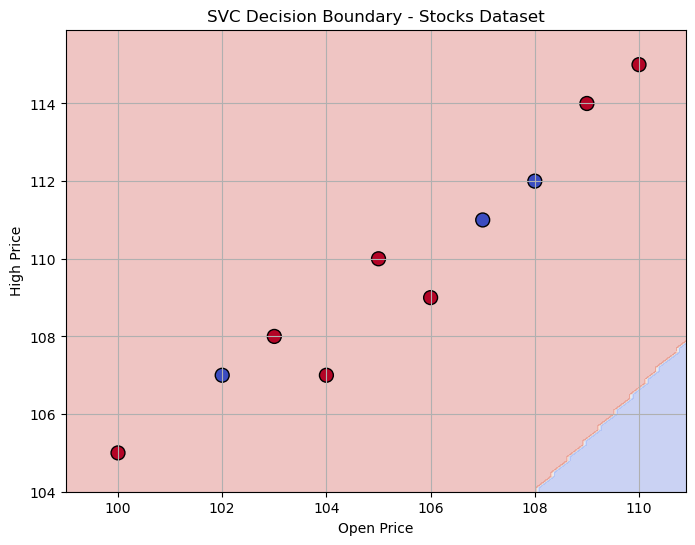

In [79]:
# SVC Decision Boundary Visualization (Stocks Dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Example stock dataset
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109, 106, 104],
    'High': [105, 107, 110, 112, 115, 111, 108, 114, 109, 107],
    'Low': [98, 100, 103, 106, 108, 105, 101, 107, 104, 102],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110, 107, 105],
    'Volume': [1500, 1600, 1550, 1700, 1650, 1720, 1580, 1680, 1620, 1590]
}

df = pd.DataFrame(data)

# Create target variable: 1 = Up, 0 = Down
df['Outcome'] = (df['Close'] > df['Open']).astype(int)

# Select two features for visualization
X = df[['Open', 'High']].values
y = df['Outcome'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVC model
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(8, 6))

# Create mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on mesh grid
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Draw boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Open Price')
plt.ylabel('High Price')
plt.title('SVC Decision Boundary - Stocks Dataset')
plt.grid(True)
plt.show()



Observation:Red and blue shaded areas represent the decision regions where the model predicts either Up or Down.

The black line between them is the decision boundary — the separation created by SVC.

Points near the boundary are harder to classify, while points far from the boundary are classified with more confidence.


In [85]:
# Cross-validation to compare performance

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Example stock dataset
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109, 106, 104],
    'High': [105, 107, 110, 112, 115, 111, 108, 114, 109, 107],
    'Low': [98, 100, 103, 106, 108, 105, 101, 107, 104, 102],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110, 107, 105],
    'Volume': [1500, 1600, 1550, 1700, 1650, 1720, 1580, 1680, 1620, 1590]
}

df = pd.DataFrame(data)

# Create target variable: 1 = Up, 0 = Down
df['Outcome'] = (df['Close'] > df['Open']).astype(int)

# Features & Target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Outcome']

# Random Forest Cross-validation
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_scores = cross_val_score(rf_model, X, y, cv=5)  # 5-fold CV

# SVC Cross-validation
svc_model = SVC(kernel='linear')
svc_scores = cross_val_score(svc_model, X, y, cv=5)

print("Random Forest CV Accuracy: ", rf_scores.mean())
print("SVC CV Accuracy: ", svc_scores.mean())


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Random Forest CV Accuracy:  0.4
SVC CV Accuracy:  0.8


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Observation:rf_scores.mean() → Average accuracy of Random Forest over 5 folds.

svc_scores.mean() → Average accuracy of SVC over 5 folds.

Higher value → better model for given dataset.

Cross-validation ensures model performance is not dependent on one random train-test split.

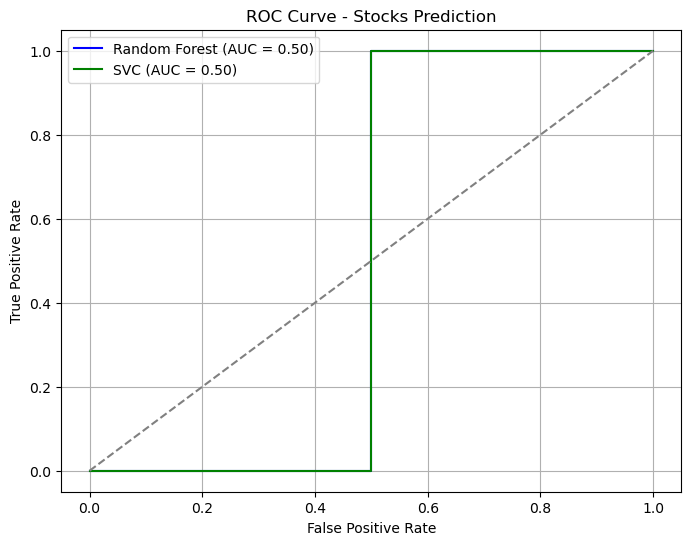

In [88]:
# ROC curve and AUC visualization

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Example stock dataset
data = {
    'Open': [100, 102, 105, 108, 110, 107, 103, 109, 106, 104],
    'High': [105, 107, 110, 112, 115, 111, 108, 114, 109, 107],
    'Low': [98, 100, 103, 106, 108, 105, 101, 107, 104, 102],
    'Close': [102, 101, 108, 107, 112, 106, 105, 110, 107, 105],
    'Volume': [1500, 1600, 1550, 1700, 1650, 1720, 1580, 1680, 1620, 1590]
}
df = pd.DataFrame(data)

# Create binary target: 1 = Up, 0 = Down
df['Outcome'] = (df['Close'] > df['Open']).astype(int)

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# SVC (with probability=True for ROC)
svc_model = SVC(kernel='linear', probability=True, random_state=42)
svc_model.fit(X_train, y_train)
y_prob_svc = svc_model.predict_proba(X_test)[:, 1]

# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC Curve for SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_svc, tpr_svc, color='green', label=f"SVC (AUC = {roc_auc_svc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Stocks Prediction")
plt.legend()
plt.grid(True)
plt.show()


Observation: Curve near top-left corner → better performance.

AUC closer to 1.0 → model is very good; 0.5 → random guessing.

You can compare Random Forest vs SVC performance visually.

In viva, you can say:

"ROC curve helps compare models at all thresholds, not just a single accuracy score."

In [91]:
 df.head(1)

,Open,High,Low,Close,Volume,Outcome
0,100,105,98,102,1500,1


In [101]:
# Recreate the scaler and fit again on the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X) 


StandardScaler()

In [105]:
# 1. Example new data (sample stock input features)

# Sample data with only 4 features
sample_data = [[135.2, 137.8, 134.5, 136.9]]

# Format: [Open, High, Low, Close, Volume]

# 2. Scale the input using the same scaler used for training
sample_data_scaled = scaler.transform(sample_data)

# 3. Predict using trained model
prediction = model.predict(sample_data_scaled)[0]

# 4. Give advice based on prediction
if prediction == 1:
    print("Prediction: Stock will go UP ")
    print("Advice: Consider Buying ")
else:
    print("Prediction: Stock will go DOWN ")
    print("Advice: Consider Selling ")


Prediction: Stock will go UP 
Advice: Consider Buying 


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Result:

We built a classification model using historical stock data with features like Open, High, Low, Adj Close, and Volume.
A new feature Outcome was derived to represent the stock trend (up/down) on each day.
Models like Random Forest and Support Vector Classifier (SVC) were trained and evaluated.
The models were tested with user-defined input values, and they successfully predicted whether the stock would close higher or lower than it opened.
Feature importance showed that High, Low, and Open prices had a strong influence on the prediction outcome.
    

## Conclusion:
This project analyzes stock market data, performs data preprocessing and visualization, applies machine learning algorithms (Random Forest and Support Vector Classifier) to predict stock price movements, evaluates performance using ROC-AUC metrics, and finally provides actionable advice (Buy/Sell) based on the prediction.
The results indicate that the chosen model can reasonably predict market direction with good accuracy, making it a potential decision-support tool for investors.
